In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy as sc
import sklearn as sk

In [2]:
home = os.getcwd()
print(os.listdir(home))

['.git', '.gitignore', '.idea', '.ipynb_checkpoints', '01-08-19-V118_ch1.big', '01-08-19-V118_ch2.big', '03-05-19_ch1.big', '03-05-19_ch2.big', '03-26-19_ch1.big', '03-26-19_ch2.big', '08-14-18-V118_ch1.big', '08-14-18-V118_ch2.big', 'alt_modular.py', 'bayesian_optimiser_tute.py', 'capstone2_milestone 2.ipynb', 'checkpoint.pth', 'data', 'data_prep.ipynb', 'data_prep_development.ipynb', 'data_prep_final.ipynb', 'EDA.ipynb', 'EDA2.ipynb', 'eda2_b.ipynb', 'EDA3.ipynb', 'Figure 2020-11-08 143412.png', 'Figure 2020-11-08 143421.png', 'ft_first_3000.csv', 'gps_inclusion.ipynb', 'init_lstm_epoch_10.dat', 'init_lstm_optim_state_epoch_10.dat', 'init_lstm_state_epoch_10.dat', 'linear_LSTM.py', 'lstm.ipynb', 'lstm2.py', 'lstm2_data_prep.py', 'lstm2_data_prep_double_sensor.py', 'LSTM_classes.py', 'LSTM_classes_functions.py', 'lstm_examples.py', 'lstm_model_01.py', 'LSTM_modular.py', 'LSTM_modular_combined.py', 'LSTM_modular_two_sensor.py', 'lstm_multivariate_working.py', 'lstm_network.py', 'LSTM_p

In [3]:
df = pd.read_csv("./01-08-19-V118_ch1.big", index_col = 0)
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10030 entries, 0 to 10029
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 20.0 MB
None
                  0            10            20            30            40  \
count  10030.000000  10030.000000  10030.000000  10030.000000  10030.000000   
mean       0.004833      0.003656      0.006918      0.007659      0.009037   
std        0.008865      0.004269      0.007605      0.009037      0.010248   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.001599      0.000778      0.001246      0.001548      0.002057   
50%        0.002563      0.002865      0.005076      0.005428      0.006893   
75%        0.004323      0.004798      0.009839      0.010255      0.012120   
max        0.088339      0.103614      0.088878      0.132022      0.114456   

                 50            60            70            80            90  \
count  10030.000000  10030.000000  10030.000000  1

0        10        20        30        40        50        60  \
0  0.002283  0.001861  0.001776  0.002652  0.004631  0.009036  0.007076   
1  0.002964  0.002919  0.003401  0.003421  0.005504  0.007987  0.007737   
2  0.004012  0.003644  0.004012  0.004476  0.006040  0.007929  0.008039   
3  0.001981  0.002050  0.003021  0.002484  0.004625  0.006709  0.007154   
4  0.001982  0.001520  0.002056  0.002422  0.006100  0.005771  0.007166   

         70        80        90  ...      2500      2510      2520      2530  \
0  0.006394  0.007697  0.016918  ...  0.000755  0.000842  0.000599  0.000773   
1  0.006090  0.006359  0.010426  ...  0.000846  0.000544  0.000791  0.000900   
2  0.007646  0.011035  0.015947  ...  0.000720  0.000657  0.000606  0.000494   
3  0.006420  0.006462  0.014294  ...  0.000838  0.000644  0.000537  0.000621   
4  0.006682  0.012416  0.018304  ...  0.000747  0.000592  0.000976  0.000469   

       2540      2550  mean_acc    median    95_acc   max_acc  
0  0.000858  0.000763  1.005810  0.776660  2.712247  5.670169  
1  0.000853  0.000741  1.101199  0.903683  2.766267  5.752741  
2  0.000623  0.000525  1.064041  0.893963  2.720738  4.977062  
3  0.000756  0.000611  1.025190  0.823598  2.650148  5.570080  
4  0.000558  0.000575  1.026970  0.808940  2.780191  6.191072  

[5 rows x 260 columns]

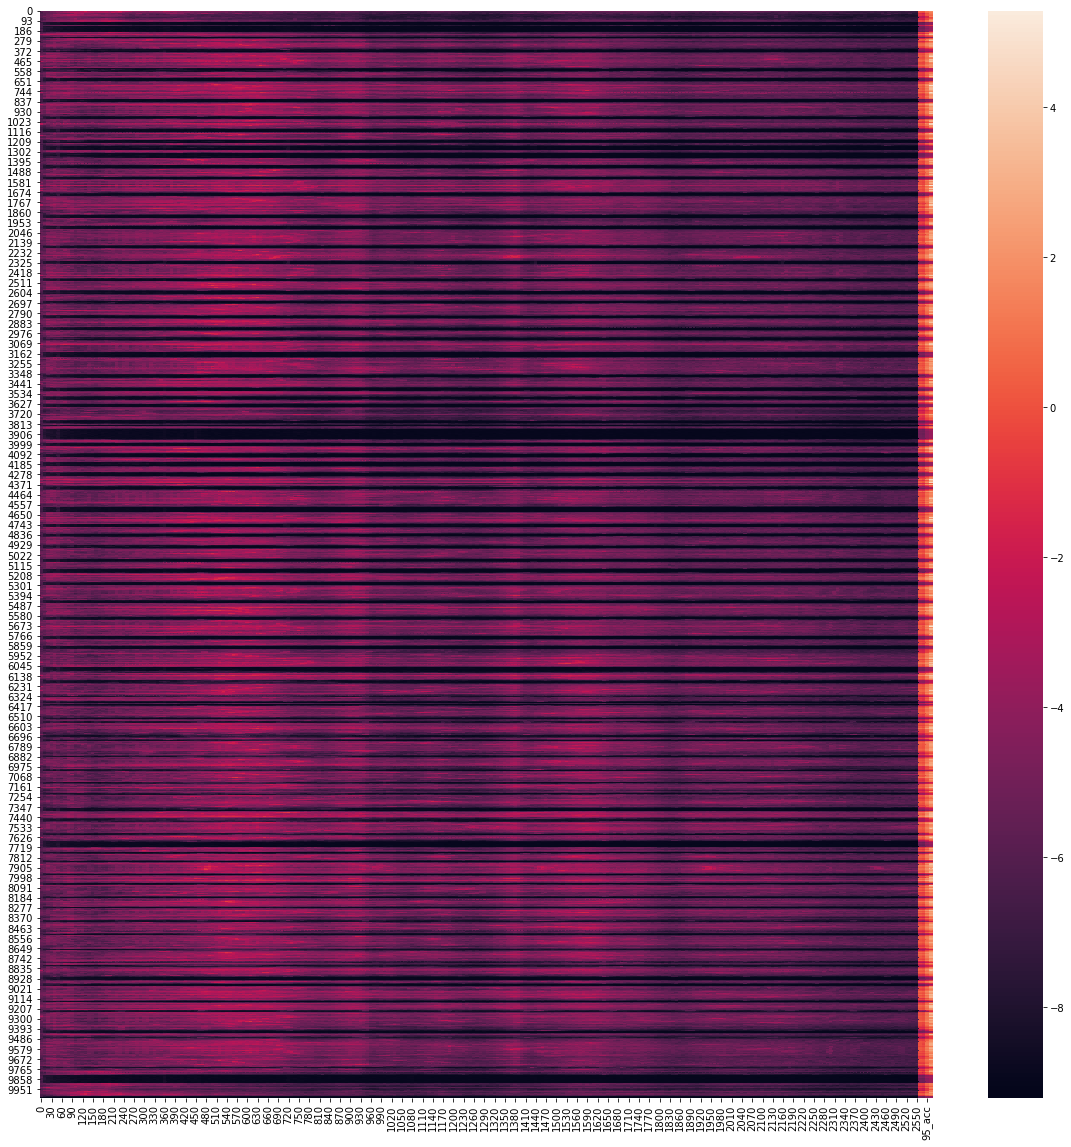

In [4]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(np.abs(df) + 0.0001))
plt.show()

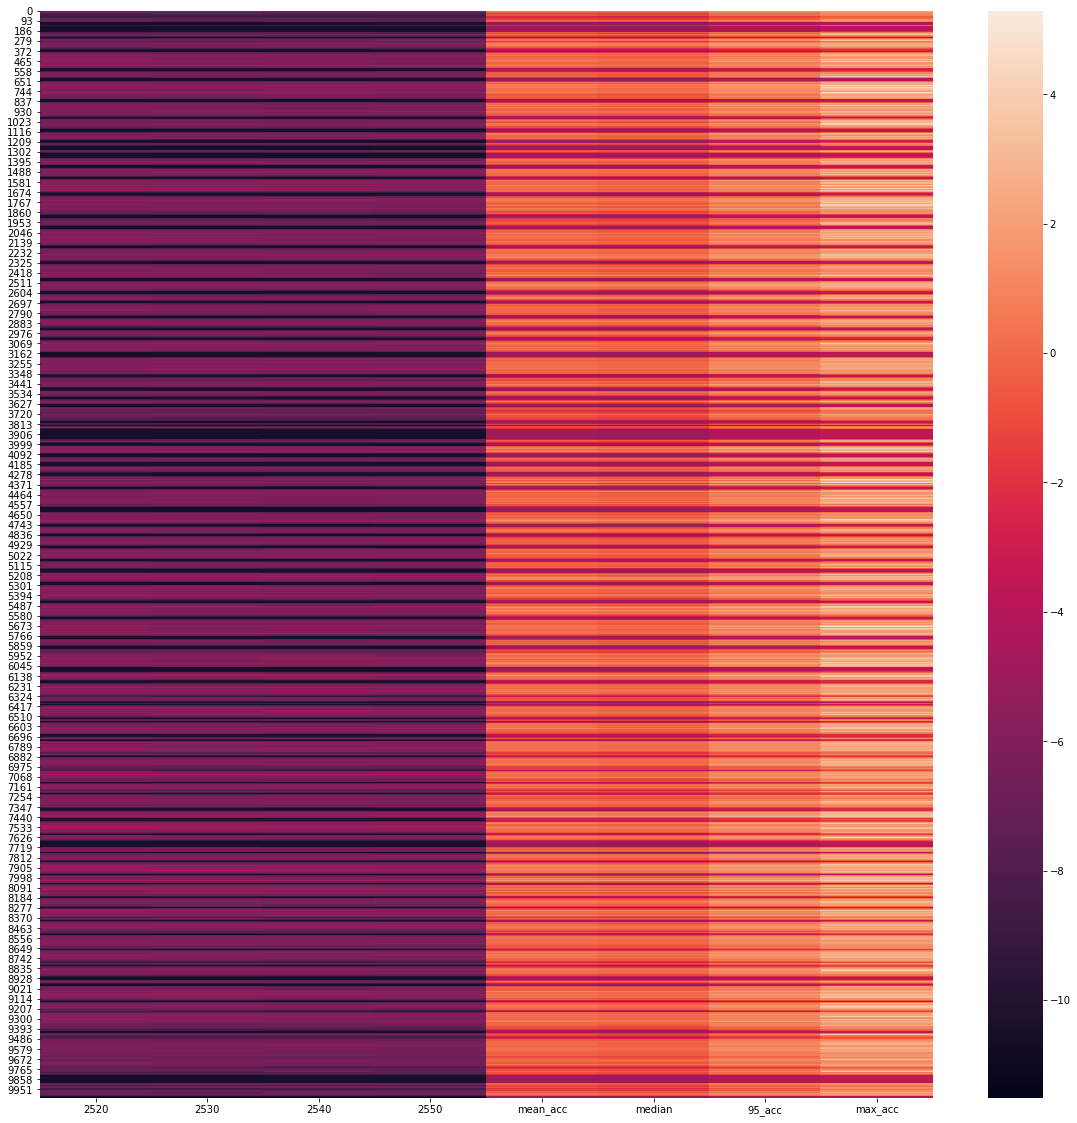

In [5]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(df.iloc[:,-8:] + 0.00001))
plt.show()

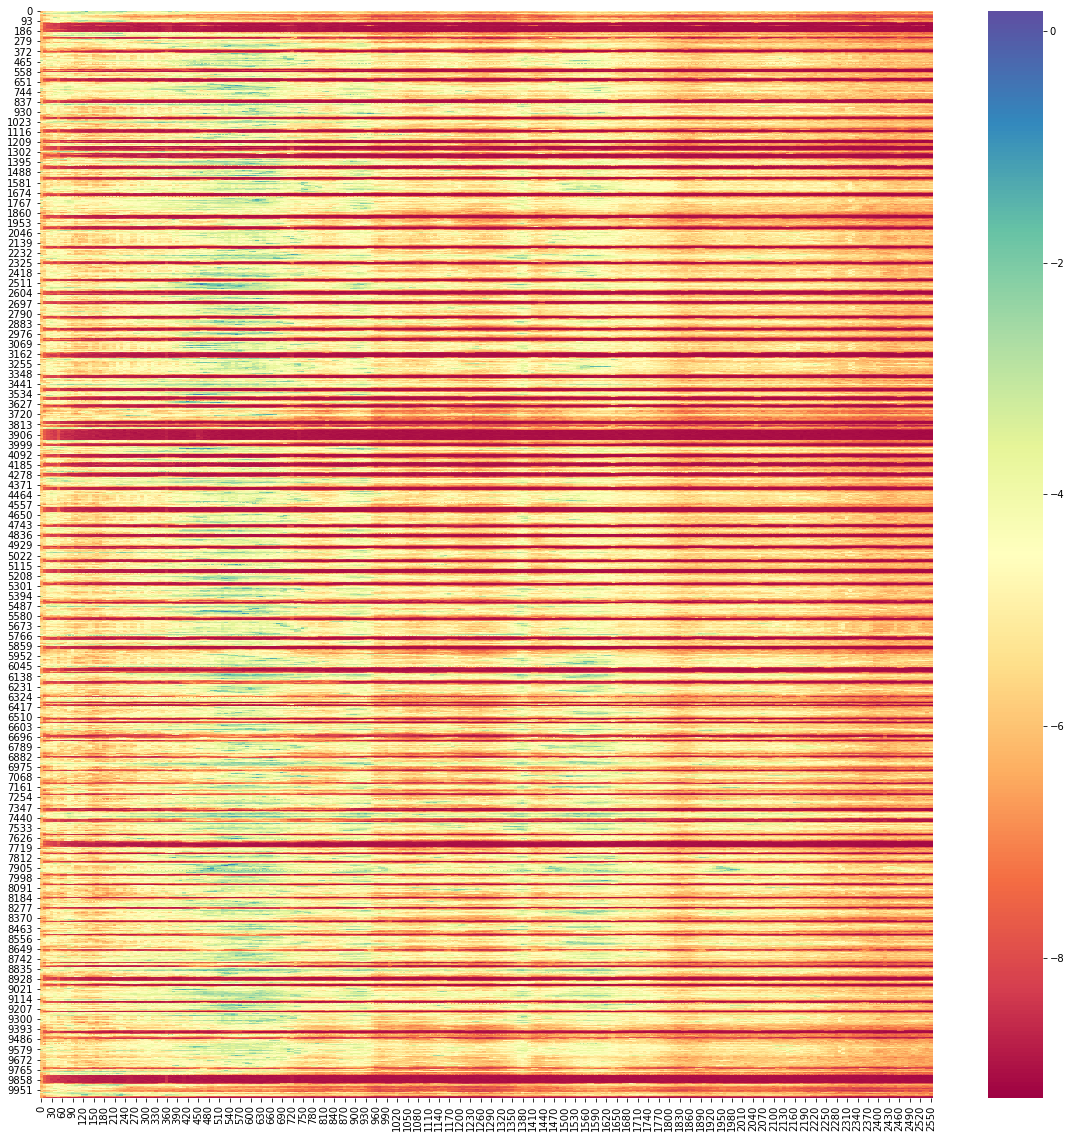

In [6]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(df.iloc[:,:-4] + 0.0001), cmap="Spectral")
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='500', ylabel='Density'>

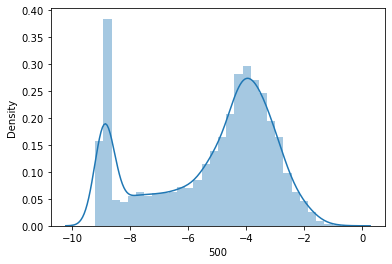

In [7]:
sb.distplot(np.log(df.iloc[:,50] + 0.0001), bins=30)

In [8]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components =2).fit(np.log(df +  0.0001))

In [9]:
gm_lab = GaussianMixture(n_components =2).fit_predict(np.log(df + 0.0001))

In [10]:
df_1 = np.log(df.iloc[:,:-4] + 0.0001)
df_2 = pd.merge(df_1, df.iloc[:,-4:], how="left", left_index=True, right_index=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10030 entries, 0 to 10029
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 20.3 MB


In [11]:
df_2.head()

0        10        20        30        40        50        60  \
0 -6.039480 -6.234231 -6.278502 -5.895418 -5.353599 -4.695563 -4.937036   
1 -5.788164 -5.802979 -5.654565 -5.648907 -5.184266 -4.817524 -4.848850   
2 -5.493906 -5.587625 -5.493913 -5.386904 -5.093011 -4.824640 -4.811125   
3 -6.175011 -6.142424 -5.769620 -5.958249 -5.354846 -4.989443 -4.926170   
4 -6.174600 -6.425383 -6.139473 -5.982540 -5.083229 -5.137705 -4.924611   

         70        80        90  ...      2500      2510      2520      2530  \
0 -5.036907 -4.854022 -4.073496  ... -7.064100 -6.967067 -7.265658 -7.043433   
1 -5.084839 -5.042338 -4.553931  ... -6.963784 -7.348236 -7.022908 -6.907865   
2 -4.860610 -4.497618 -4.132253  ... -7.106035 -7.186679 -7.255797 -7.428846   
3 -5.032875 -5.026419 -4.240940  ... -6.972106 -7.203802 -7.358902 -7.234179   
4 -4.993516 -4.380743 -3.995183  ... -7.073844 -7.275724 -6.834106 -7.471036   

       2540      2550  mean_acc    median    95_acc   max_acc  
0 -6.950410 -7.055047  1.005810  0.776660  2.712247  5.670169  
1 -6.956127 -7.081192  1.101199  0.903683  2.766267  5.752741  
2 -7.231827 -7.378484  1.064041  0.893963  2.720738  4.977062  
3 -7.062714 -7.248772  1.025190  0.823598  2.650148  5.570080  
4 -7.326467 -7.301442  1.026970  0.808940  2.780191  6.191072  

[5 rows x 260 columns]

In [12]:
df_2["gm_lab"] = (gm_lab *5) - 10

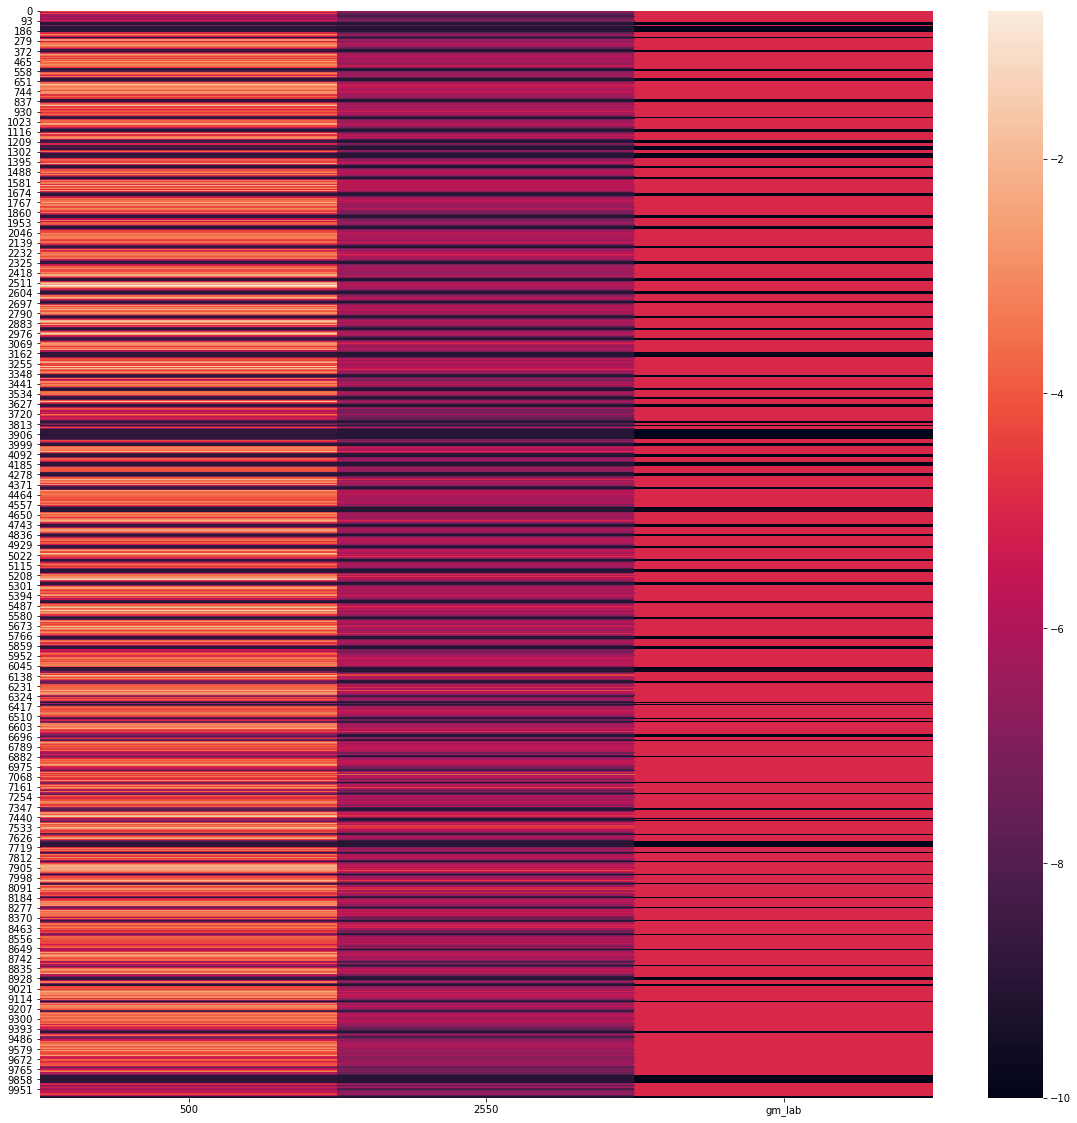

In [13]:
plt.figure(figsize=(20,20))
sb.heatmap(df_2.iloc[:, [50, -6, -1]])
plt.show()

In [14]:
moving = df_2[df_2["gm_lab"] != -5]
moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 112 to 10029
Columns: 261 entries, 0 to gm_lab
dtypes: float64(260), int64(1)
memory usage: 3.5 MB


In [15]:
stopped = df_2[df_2["gm_lab"] == -5]
stopped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8255 entries, 0 to 10019
Columns: 261 entries, 0 to gm_lab
dtypes: float64(260), int64(1)
memory usage: 16.5 MB


In [16]:
stopped.mean()

0          -5.637982
10         -5.734393
20         -5.164363
30         -5.063172
40         -4.880300
              ...   
mean_acc    0.902964
median      0.712138
95_acc      2.364028
max_acc     9.820715
gm_lab     -5.000000
Length: 261, dtype: float64

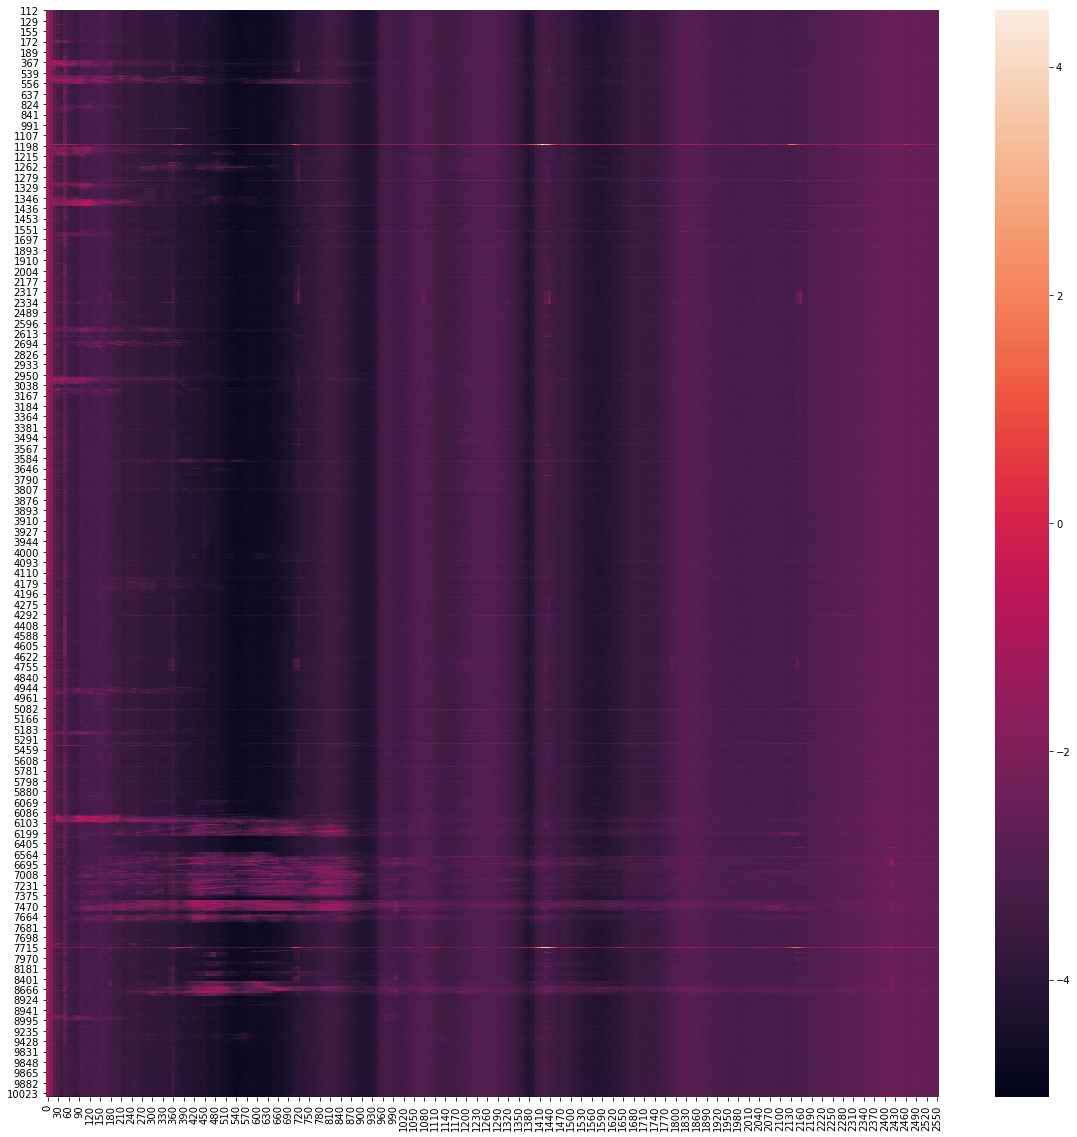

In [17]:
plt.figure(figsize=(20,20))
sb.heatmap((moving - stopped.mean()).iloc[:,:-5])
plt.show()


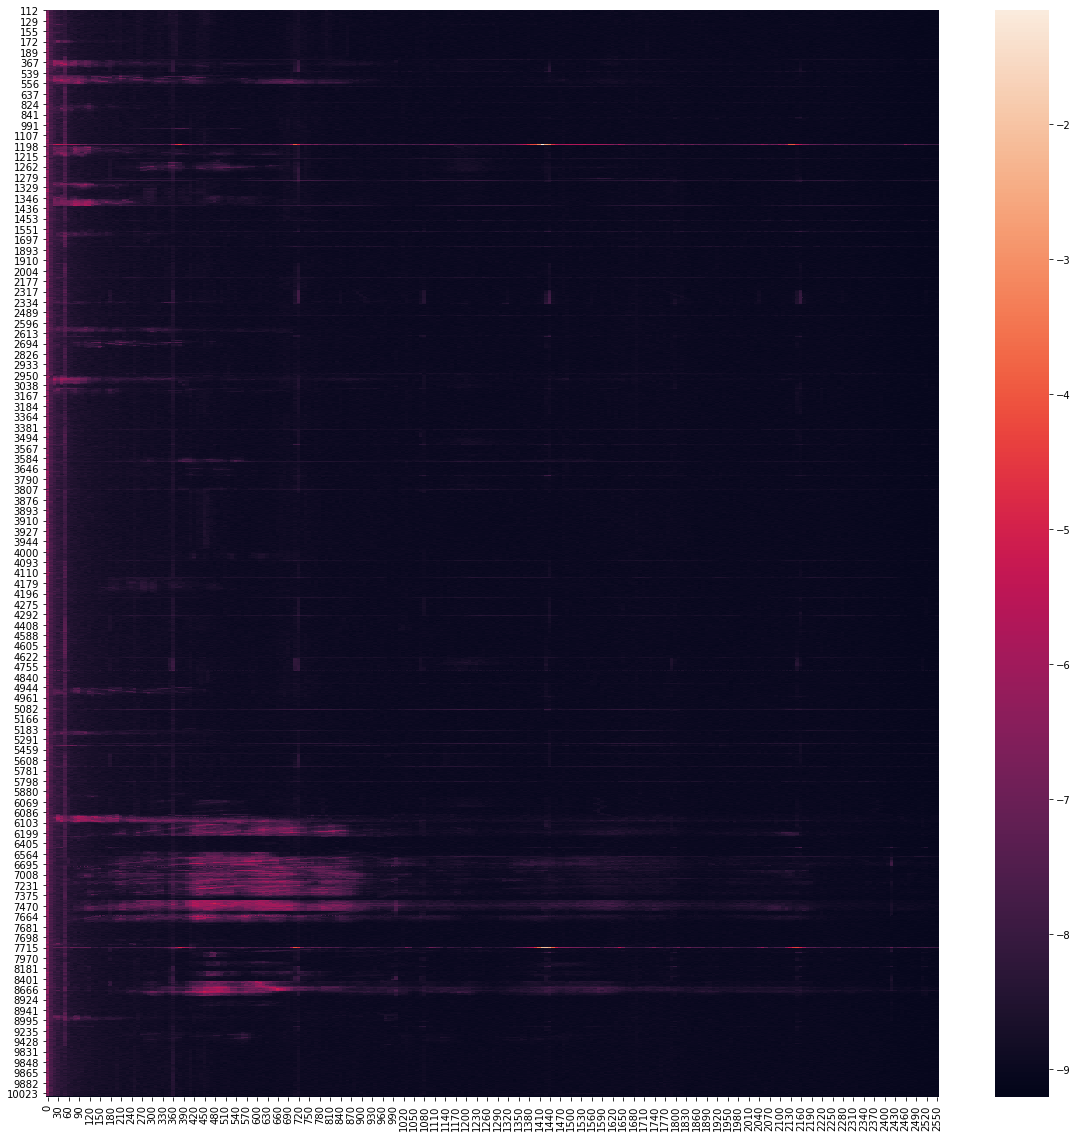

In [18]:
plt.figure(figsize=(20,20))
sb.heatmap(moving.iloc[:,:-5])
plt.show()

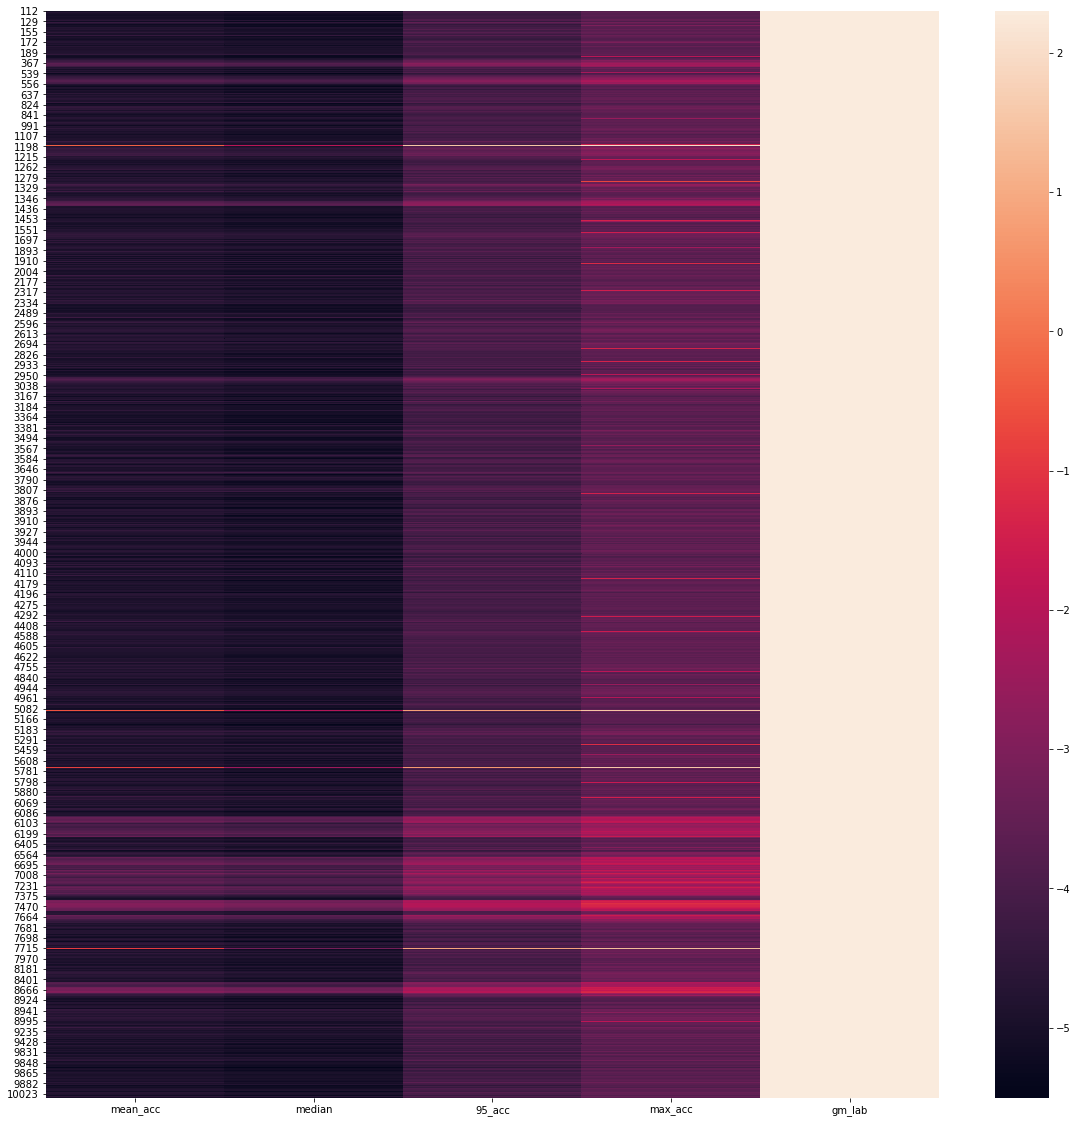

In [19]:
plt.figure(figsize=(20,20))
sb.heatmap(np.log(np.abs(moving.iloc[:,-5:]) + 0.001))
plt.show()

In [20]:
from sklearn.cluster import KMeans as km
five = km(n_clusters=5, random_state=42).fit(moving)

In [21]:
five.labels_.mean()

1.9064788732394367

In [22]:
new_col = {"km_5":five.labels_}

In [23]:
new_col_series  = pd.DataFrame(new_col)

In [24]:
m2 = moving.copy()

In [25]:
m3 = m2.copy()

In [26]:
m3["km_5"] = five.labels_

In [27]:
m3.head()
m3 = m3.reset_index()
s2 = stopped.reset_index()
s2.head()

index         0        10        20        30        40        50  \
0      0 -6.039480 -6.234231 -6.278502 -5.895418 -5.353599 -4.695563   
1      1 -5.788164 -5.802979 -5.654565 -5.648907 -5.184266 -4.817524   
2      2 -5.493906 -5.587625 -5.493913 -5.386904 -5.093011 -4.824640   
3      3 -6.175011 -6.142424 -5.769620 -5.958249 -5.354846 -4.989443   
4      4 -6.174600 -6.425383 -6.139473 -5.982540 -5.083229 -5.137705   

         60        70        80  ...      2510      2520      2530      2540  \
0 -4.937036 -5.036907 -4.854022  ... -6.967067 -7.265658 -7.043433 -6.950410   
1 -4.848850 -5.084839 -5.042338  ... -7.348236 -7.022908 -6.907865 -6.956127   
2 -4.811125 -4.860610 -4.497618  ... -7.186679 -7.255797 -7.428846 -7.231827   
3 -4.926170 -5.032875 -5.026419  ... -7.203802 -7.358902 -7.234179 -7.062714   
4 -4.924611 -4.993516 -4.380743  ... -7.275724 -6.834106 -7.471036 -7.326467   

       2550  mean_acc    median    95_acc   max_acc  gm_lab  
0 -7.055047  1.005810  0.776660  2.712247  5.670169      -5  
1 -7.081192  1.101199  0.903683  2.766267  5.752741      -5  
2 -7.378484  1.064041  0.893963  2.720738  4.977062      -5  
3 -7.248772  1.025190  0.823598  2.650148  5.570080      -5  
4 -7.301442  1.026970  0.808940  2.780191  6.191072      -5  

[5 rows x 262 columns]

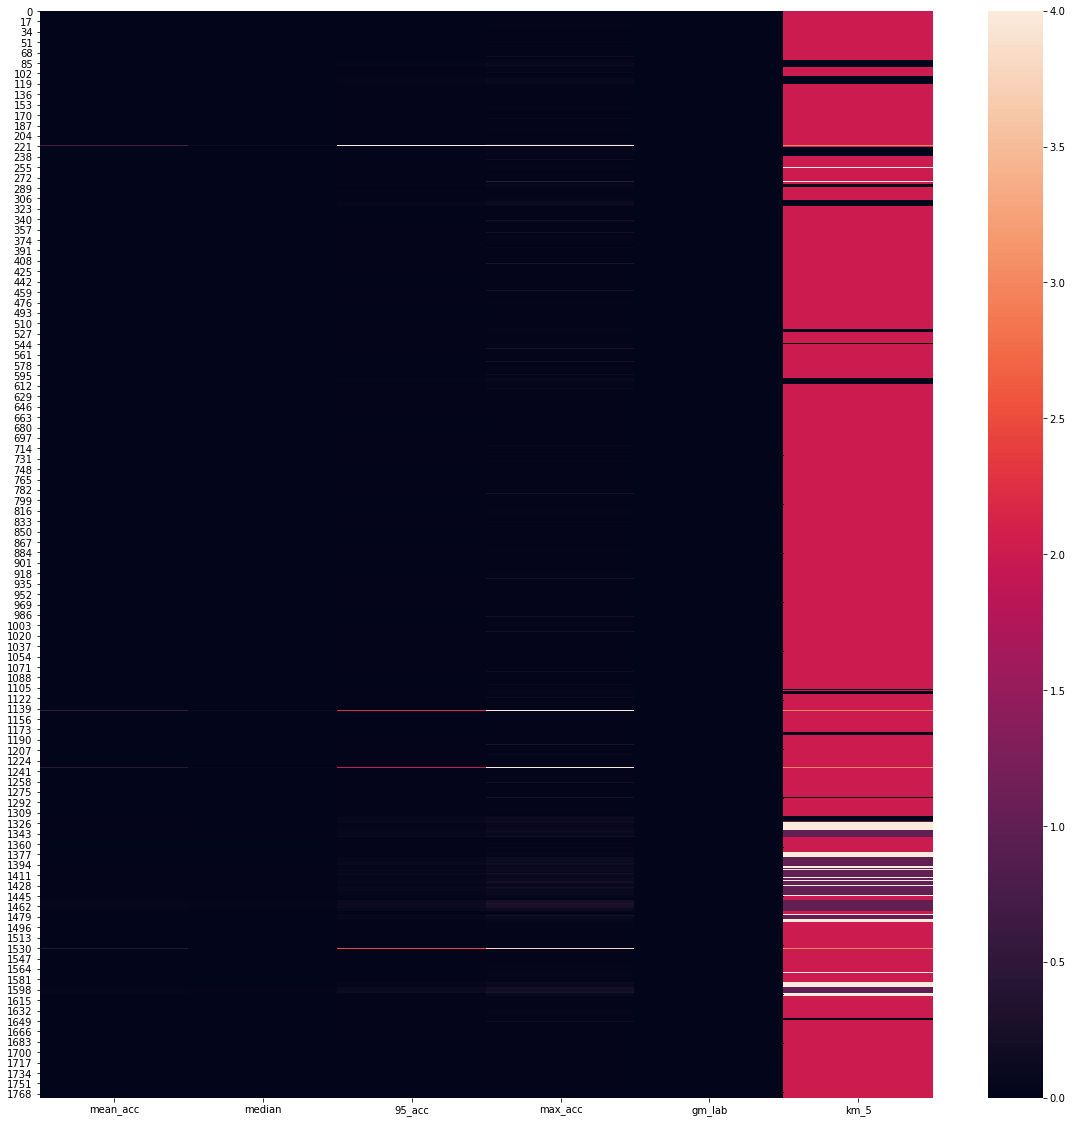

In [28]:
plt.figure(figsize=(20,20))
sb.heatmap(m3.iloc[:,-6:], vmin=0, vmax=4)
plt.show()

In [29]:
rebuild = pd.concat([m3, s2])

In [30]:
rebuild.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10030 entries, 0 to 8254
Columns: 263 entries, index to km_5
dtypes: float64(261), int64(2)
memory usage: 20.2 MB


In [31]:
rebuild.head()

index         0        10        20        30        40        50  \
0    112 -7.153492 -7.909102 -8.263797 -7.973094 -8.322234 -8.330785   
1    113 -7.312616 -7.766350 -8.121606 -8.255214 -8.399864 -8.117082   
2    114 -6.732753 -7.918943 -8.173448 -8.328849 -8.372852 -8.333397   
3    115 -6.653104 -7.810870 -8.201239 -8.322581 -8.425349 -8.282687   
4    116 -6.923089 -7.940447 -7.943564 -8.286512 -8.484864 -8.255388   

         60        70        80  ...      2520      2530      2540      2550  \
0 -8.416538 -8.467074 -8.644016  ... -9.049743 -9.074194 -9.063613 -9.018866   
1 -8.637945 -8.536790 -8.487560  ... -9.051182 -9.098867 -9.067592 -9.072141   
2 -8.411582 -8.632527 -8.570161  ... -9.067667 -9.052423 -9.096910 -9.028046   
3 -8.706800 -8.583862 -8.650466  ... -9.044818 -9.059676 -9.071110 -9.035372   
4 -8.561029 -8.407769 -8.645372  ... -9.082122 -9.037854 -9.054646 -9.039048   

   mean_acc    median    95_acc   max_acc  gm_lab  km_5  
0  0.004383  0.003372  0.011021  0.055285     -10   2.0  
1  0.003770  0.003197  0.009080  0.017081     -10   2.0  
2  0.005165  0.004128  0.013016  0.021155     -10   2.0  
3  0.007784  0.007215  0.016838  0.026025     -10   2.0  
4  0.004793  0.004215  0.011247  0.019908     -10   2.0  

[5 rows x 263 columns]

In [32]:
rebuild.tail()

index         0        10        20        30        40        50  \
8250  10015 -6.355502 -6.682718 -6.174094 -5.704816 -5.351908 -4.703356   
8251  10016 -6.807234 -7.141992 -6.500065 -5.835761 -5.412043 -4.082229   
8252  10017 -6.462863 -7.106976 -5.901443 -5.754946 -5.449752 -5.476417   
8253  10018 -6.263019 -6.704623 -6.381699 -6.993957 -7.495943 -7.714698   
8254  10019 -6.057852 -7.537775 -7.579287 -6.891793 -7.690990 -7.673104   

            60        70        80  ...      2520      2530      2540  \
8250 -4.817686 -5.071713 -4.586143  ... -8.544553 -8.745292 -8.659748   
8251 -4.491457 -4.723459 -5.447078  ... -8.802255 -8.709040 -8.765409   
8252 -6.293615 -6.555733 -6.419817  ... -8.780973 -8.802852 -8.862558   
8253 -8.015445 -8.173831 -8.185465  ... -8.410055 -8.306223 -8.200957   
8254 -7.765524 -8.133901 -8.280688  ... -8.080751 -8.108658 -8.489551   

          2550  mean_acc    median    95_acc   max_acc  gm_lab  km_5  
8250 -8.538361  0.119445  0.098362  0.306320  0.902089      -5   NaN  
8251 -8.832468  0.109733  0.094117  0.260601  0.685129      -5   NaN  
8252 -8.937183  0.035472  0.028060  0.091397  0.267726      -5   NaN  
8253 -8.149998  0.073315  0.064374  0.173394  0.320634      -5   NaN  
8254 -8.720219  0.050538  0.018674  0.243688  0.630132      -5   NaN  

[5 rows x 263 columns]

In [33]:
r2 = rebuild.set_index("index")
r2 = r2.sort_index()
# r2 = r2.drop("level_0", axis =1)
r2.km_5 = r2.km_5.fillna(-1)
r2.gm_lab = (r2.gm_lab + 10 ) / 5

In [34]:
r2.head()

0        10        20        30        40        50        60  \
index                                                                         
0     -6.039480 -6.234231 -6.278502 -5.895418 -5.353599 -4.695563 -4.937036   
1     -5.788164 -5.802979 -5.654565 -5.648907 -5.184266 -4.817524 -4.848850   
2     -5.493906 -5.587625 -5.493913 -5.386904 -5.093011 -4.824640 -4.811125   
3     -6.175011 -6.142424 -5.769620 -5.958249 -5.354846 -4.989443 -4.926170   
4     -6.174600 -6.425383 -6.139473 -5.982540 -5.083229 -5.137705 -4.924611   

             70        80        90  ...      2520      2530      2540  \
index                                ...                                 
0     -5.036907 -4.854022 -4.073496  ... -7.265658 -7.043433 -6.950410   
1     -5.084839 -5.042338 -4.553931  ... -7.022908 -6.907865 -6.956127   
2     -4.860610 -4.497618 -4.132253  ... -7.255797 -7.428846 -7.231827   
3     -5.032875 -5.026419 -4.240940  ... -7.358902 -7.234179 -7.062714   
4     -4.993516 -4.380743 -3.995183  ... -6.834106 -7.471036 -7.326467   

           2550  mean_acc    median    95_acc   max_acc  gm_lab  km_5  
index                                                                  
0     -7.055047  1.005810  0.776660  2.712247  5.670169     1.0  -1.0  
1     -7.081192  1.101199  0.903683  2.766267  5.752741     1.0  -1.0  
2     -7.378484  1.064041  0.893963  2.720738  4.977062     1.0  -1.0  
3     -7.248772  1.025190  0.823598  2.650148  5.570080     1.0  -1.0  
4     -7.301442  1.026970  0.808940  2.780191  6.191072     1.0  -1.0  

[5 rows x 262 columns]

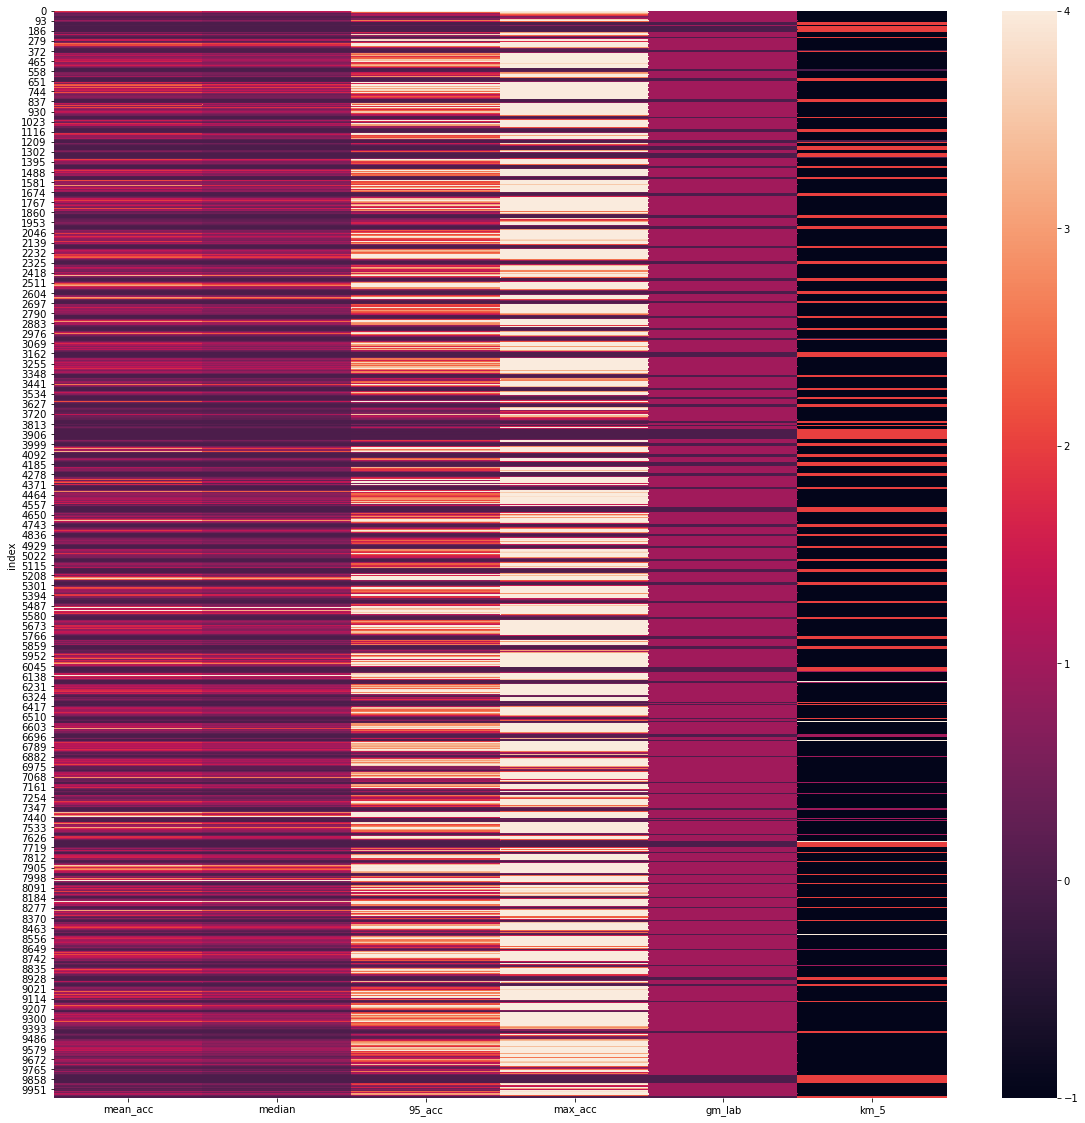

In [35]:
plt.figure(figsize=(20,20))
sb.heatmap(r2.iloc[:,-6:], vmin=-1, vmax=4)
plt.show()

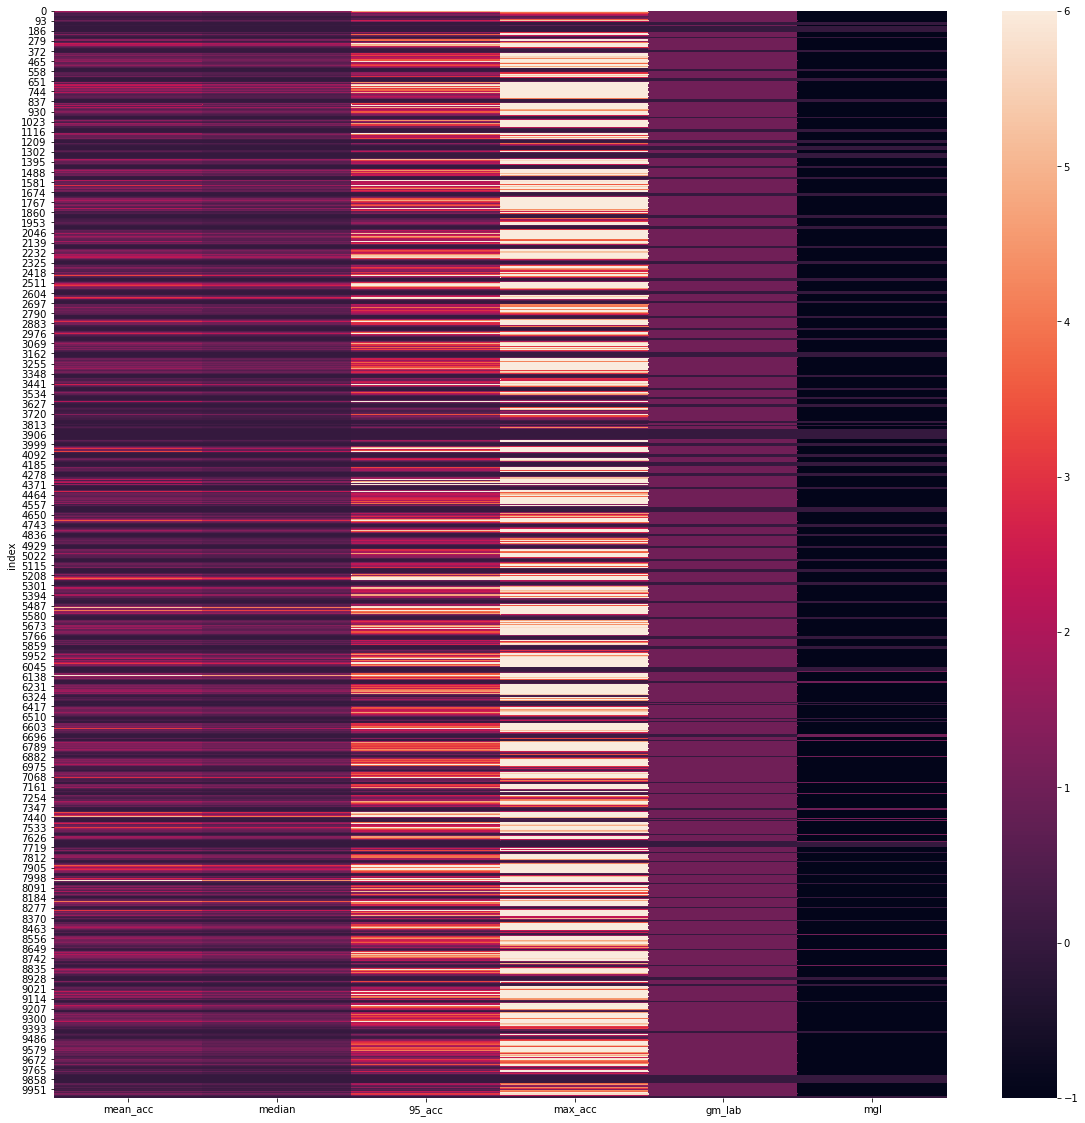

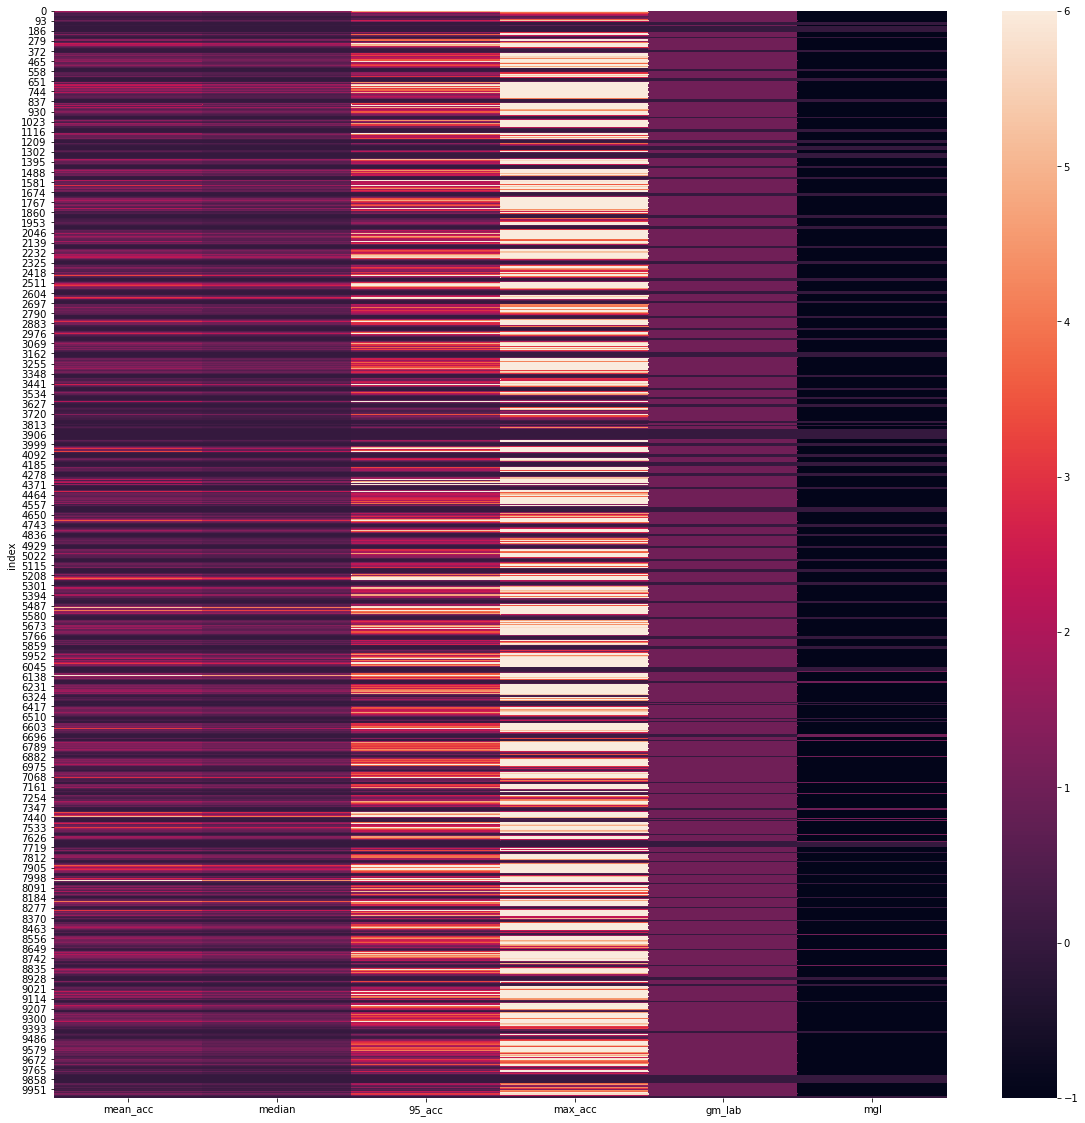

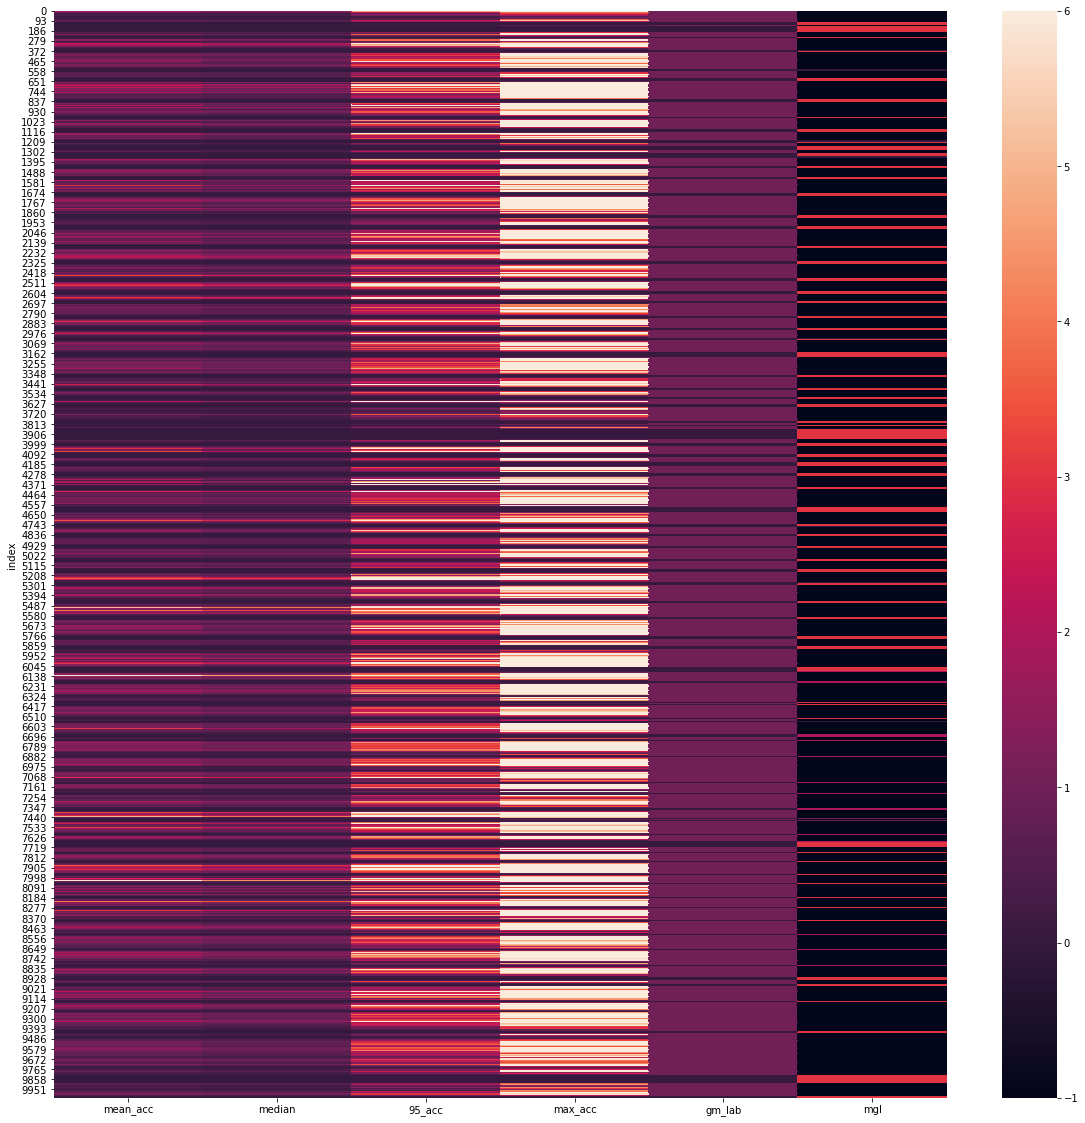

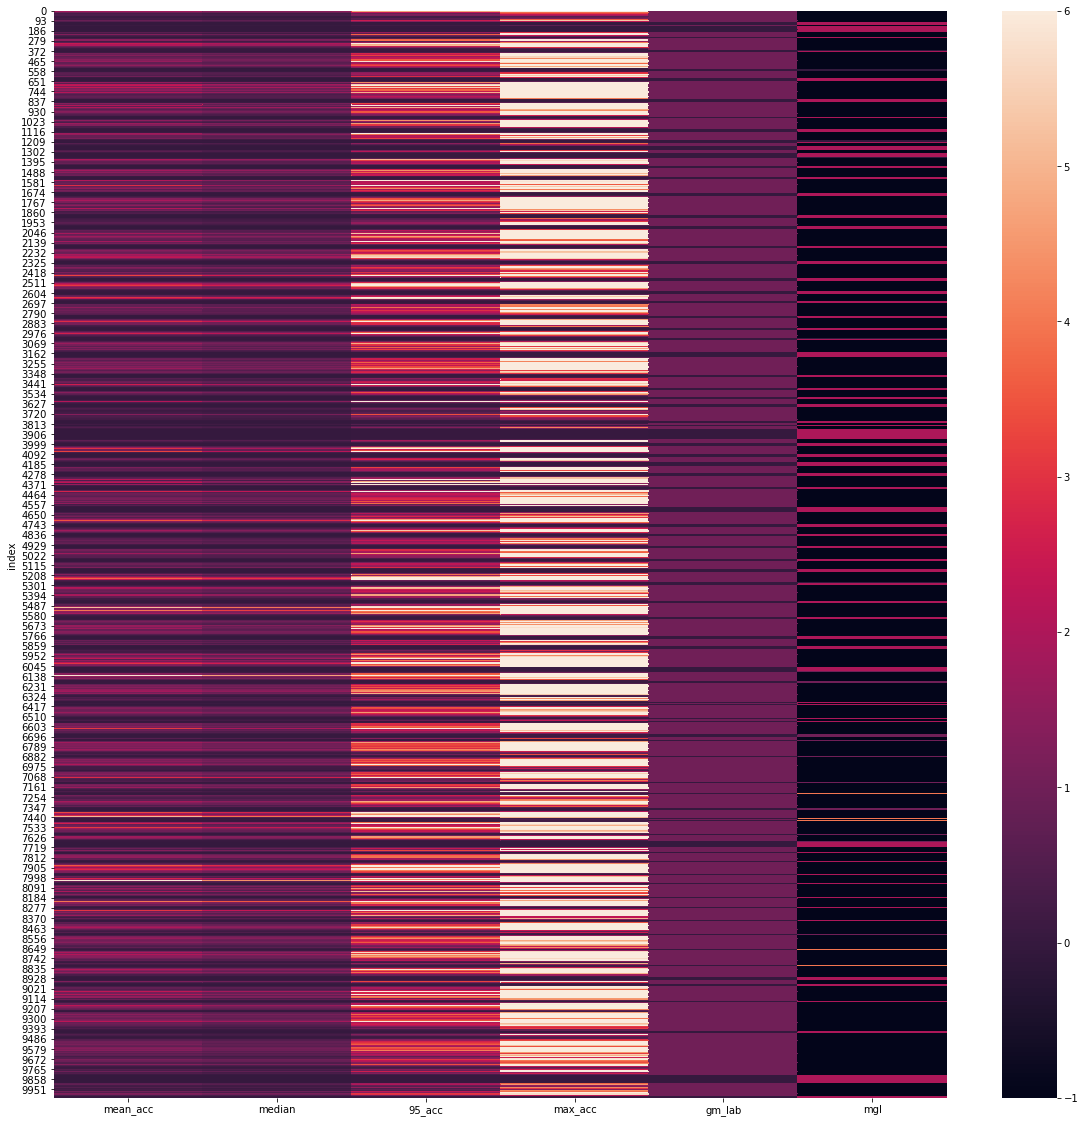

In [36]:
for i in np.arange(2, 6):
    gml = GaussianMixture(n_components = i).fit_predict(m2)
    m4 = m2.reset_index()
    m4["mgl"] = gml
#     print(m4.head())
    r1 = pd.concat([m4, s2])
#     print(r1.head())
    r1 = r1.set_index("index")
    r1 = r1.sort_index()
#     r1 = r1.drop("level_0", axis =1)
#     print(r1.head())
    r1.mgl = r1.mgl.fillna(-1)
    r1.gm_lab = (r1.gm_lab + 10 ) / 5
    plt.figure(figsize=(20,20))
    sb.heatmap(r1.iloc[:,-6:], vmin=-1, vmax=6)
    plt.show()

In [37]:
from sklearn.decomposition import PCA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10030 entries, 0 to 10029
Columns: 260 entries, 0 to max_acc
dtypes: float64(260)
memory usage: 20.3 MB


In [38]:
pca = PCA(n_components = 130).fit(df)
df_pca = pca.transform(df)

In [39]:

gm_lab_pca = GaussianMixture(n_components =2).fit_predict(df_pca)

In [40]:
df_pca_l = pd.DataFrame(df_pca)
df_pca_l["move"] = gm_lab_pca
df_pca_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Columns: 131 entries, 0 to move
dtypes: float64(130), int64(1)
memory usage: 10.0 MB


In [41]:
df_pca_l.describe()

0             1             2             3             4  \
count  1.003000e+04  1.003000e+04  1.003000e+04  1.003000e+04  1.003000e+04   
mean   1.655395e-15  7.194865e-17  7.212783e-17  1.991559e-18 -1.047346e-17   
std    1.332582e+01  1.769916e+00  1.727759e-01  6.177984e-02  5.244215e-02   
min   -8.272513e+00 -1.573266e+01 -1.770457e+00 -3.499511e-01 -3.916498e-01   
25%   -7.753772e+00 -7.449477e-01 -6.199518e-02 -1.772969e-02 -1.244448e-02   
50%   -3.877003e+00  3.490088e-01  1.620633e-02  6.733864e-03 -1.139337e-03   
75%    1.669444e+00  1.154633e+00  5.341890e-02  9.164185e-03  7.705846e-03   
max    1.893336e+02  2.022924e+01  3.007313e+00  1.340885e+00  5.527931e-01   

                  5             6             7             8             9  \
count  1.003000e+04  1.003000e+04  1.003000e+04  1.003000e+04  1.003000e+04   
mean   1.914422e-18 -3.937978e-18  4.651930e-18  4.691623e-18  7.195643e-18   
std    4.674978e-02  4.234995e-02  3.715779e-02  3.566092e-02  3.365385e-02   
min   -5.160426e-01 -4.292177e-01 -2.659886e-01 -2.808766e-01 -3.427580e-01   
25%   -9.512631e-03 -1.393211e-02 -1.253450e-02 -1.084106e-02 -1.150532e-02   
50%   -6.074420e-03  6.224637e-03  4.067353e-03 -2.172282e-03 -3.807195e-03   
75%    1.537609e-02  1.019947e-02  6.480243e-03  6.743477e-03  6.162211e-03   
max    6.059655e-01  5.954953e-01  4.958966e-01  2.990736e-01  6.061087e-01   

       ...           121           122           123           124  \
count  ...  1.003000e+04  1.003000e+04  1.003000e+04  1.003000e+04   
mean   ... -5.943168e-19  5.642229e-19  3.939259e-19 -4.882477e-19   
std    ...  3.529452e-03  3.499228e-03  3.493496e-03  3.389774e-03   
min    ... -2.966333e-02 -3.969948e-02 -3.493835e-02 -3.027574e-02   
25%    ... -1.039886e-03 -9.976819e-04 -1.047118e-03 -1.196056e-03   
50%    ...  2.654495e-05 -6.971101e-06  9.962633e-05  8.130931e-05   
75%    ...  1.032934e-03  9.012467e-04  9.412154e-04  1.095694e-03   
max    ...  3.379473e-02  4.991554e-02  4.802306e-02  4.250718e-02   

                125           126           127           128           129  \
count  1.003000e+04  1.003000e+04  1.003000e+04  1.003000e+04  1.003000e+04   
mean  -6.907654e-19 -1.588740e-19  1.765407e-18 -6.578718e-20 -1.813223e-18   
std    3.320149e-03  3.312871e-03  3.273185e-03  3.217351e-03  3.172104e-03   
min   -3.065277e-02 -3.584693e-02 -3.392172e-02 -4.342366e-02 -2.889681e-02   
25%   -8.864792e-04 -8.274193e-04 -8.509985e-04 -9.115418e-04 -7.104133e-04   
50%   -1.084829e-04 -2.962943e-04 -8.321885e-05  9.915196e-05 -1.844201e-04   
75%    8.517120e-04  9.922858e-04  8.443526e-04  8.422155e-04  8.753323e-04   
max    4.826655e-02  5.411131e-02  4.652993e-02  5.389495e-02  3.357055e-02   

               move  
count  10030.000000  
mean       0.541675  
std        0.498285  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 131 columns]

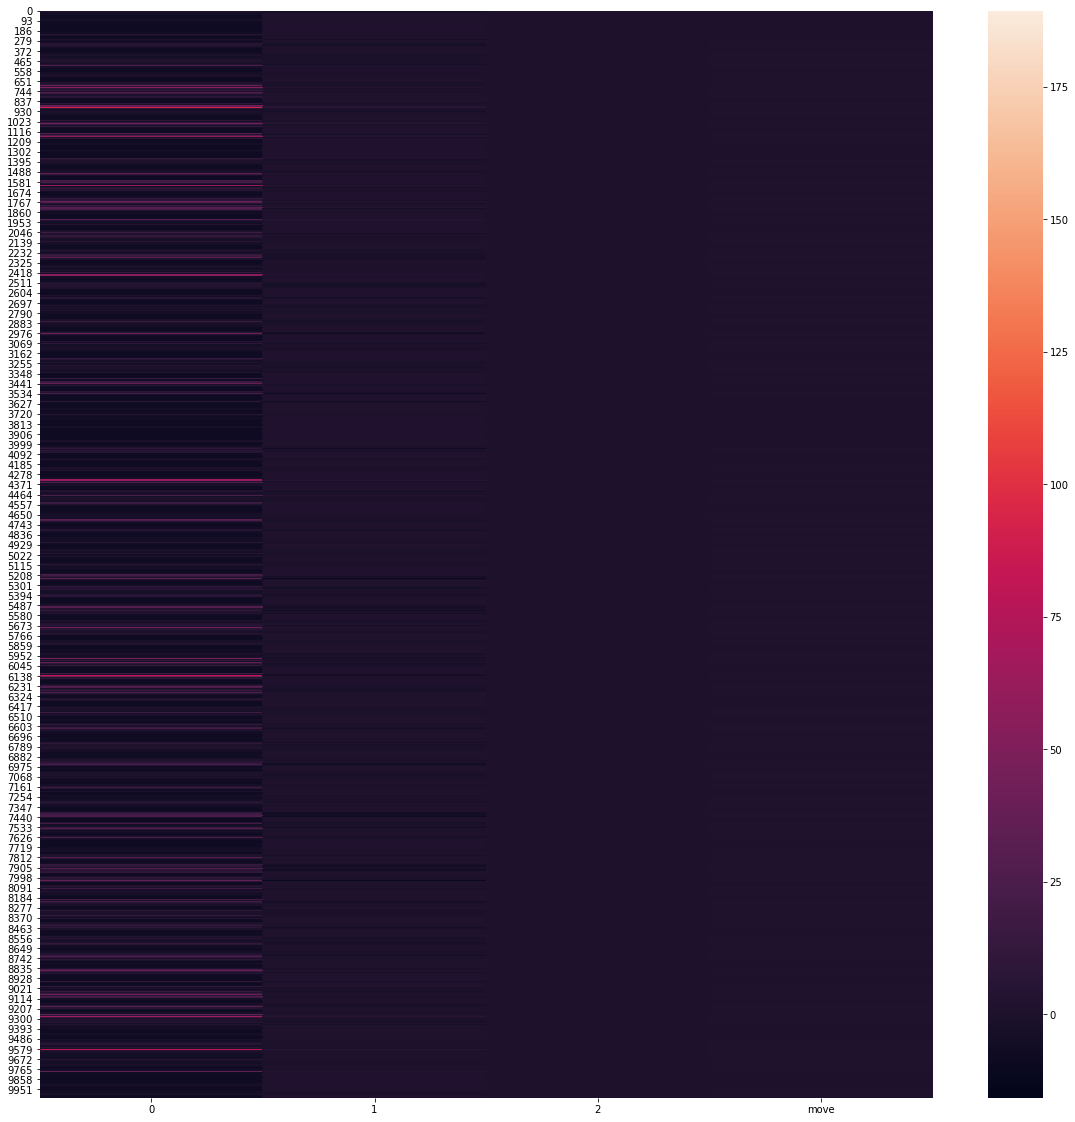

In [42]:
plt.figure(figsize=(20,20))
sb.heatmap(df_pca_l.iloc[:,[0,1,2,130]])
plt.show()